In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from keras.utils import to_categorical
import random

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
np.random.seed(1)

In [4]:
train_data = pd.read_excel("Training sheet.xlsx")
#add product year 2012 as new variable into train dataset and assign 0 to this column
train_data['production_year_2012'] = 0

In [5]:
train_data.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category,production_year_2012
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9,0
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9,0
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9,0
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9,0
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9,0


Since id is not useful in the classification task, so I will delete id first

In [6]:
train_data = train_data.drop(['id'],axis=1)

In [7]:
train_data.head()

,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category,production_year_2012
0,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9,0
1,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9,0
2,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9,0
3,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9,0
4,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9,0


In [8]:
# since the 'total' column is highly correlated with Category and it doesn't exit in the test dataset, 
# so I will drop it.
train_data['total'].corr(train_data['Category'])

0.8054966083826666

In [9]:
train_data = train_data.drop(['total'],axis=1)

In [10]:
train_data.head()

,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,Category,production_year_2012
0,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,9,0
1,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,9,0
2,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,9,0
3,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,9,0
4,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,9,0


In [11]:
#For movies names, it could have positive impact or negative impact or no impact on the category
#For customers and investors, they know Harry Potter very well based on the previous movies or the book.
#Another good example is Avatar. Investor cannot know what is Avatar just based on the name. 
#They need to look at the movie descriptions, movies lines, background stories etc to understand this movie.
#As a result, movie name and display name do not have any impact in this case
train_data = train_data.drop(['name'], axis =1)
train_data = train_data.drop(['display_name'], axis = 1)

In [12]:
train_data.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,Category,production_year_2012
0,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,9,0
1,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,9,0
2,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,9,0
3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,9,0
4,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,9,0


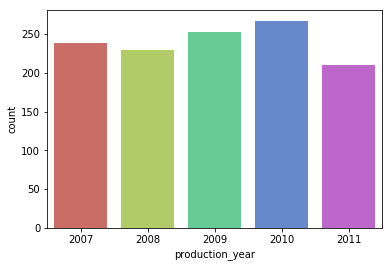

<Figure size 432x288 with 0 Axes>

In [13]:
#see the distribution of the year
sns.countplot(x='production_year',data=train_data,palette='hls')
plt.show()
plt.savefig('count_plot')
#based on the result, the movies are well distributed by different years

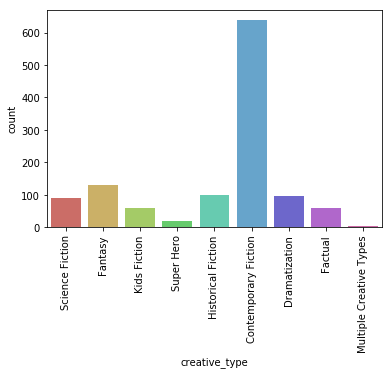

<Figure size 432x288 with 0 Axes>

In [14]:
#see the distribution of creative type
sns.countplot(x='creative_type',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#most of the movies are contemporary fiction, but there are other movies in other creative types

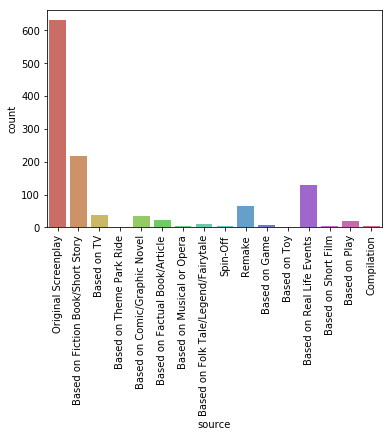

<Figure size 432x288 with 0 Axes>

In [15]:
#see the distribution of the source
sns.countplot(x='source',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#most of the movies are "original screenplay", but there are movies from other sources

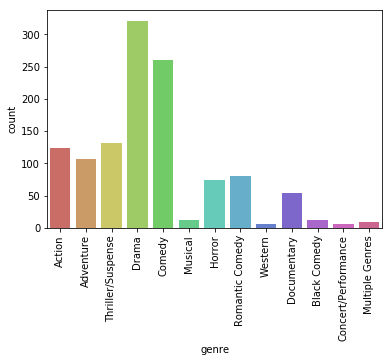

<Figure size 432x288 with 0 Axes>

In [16]:
#see the distribution of the genre
sns.countplot(x='genre',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#based on the result, the movies genres are well distributed

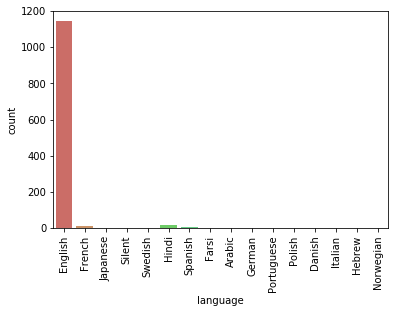

<Figure size 432x288 with 0 Axes>

In [17]:
#see the distribution of the language
sns.countplot(x='language',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#based on the result, almost all movies are English. So language is not a good variable for prediction

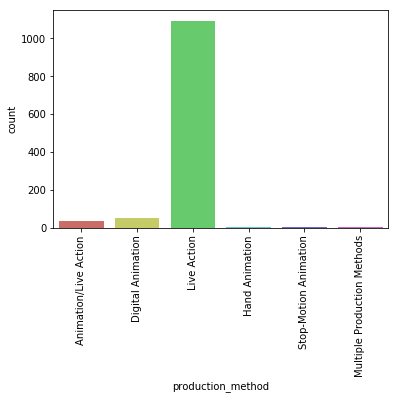

<Figure size 432x288 with 0 Axes>

In [18]:
#see the distribution of the product method
sns.countplot(x='production_method',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#based on the result, almost all movies are Live Action. I will keep this variable so far.

In [19]:
#see the unique values in the board_rating_reason
train_data["board_rating_reason"].unique()
#there are so many unique values in this variable, and they are only descriptive words of the movie rating
#so they are not very useful in this case, so we can delete it
train_data = train_data.drop(['board_rating_reason'],axis =1)

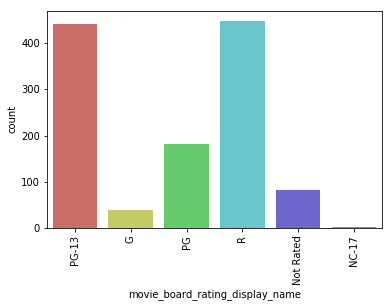

<Figure size 432x288 with 0 Axes>

In [20]:
#see the distribution of the movie board rating display name
sns.countplot(x='movie_board_rating_display_name',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#based on the result, the movies are well distributed to different ratings

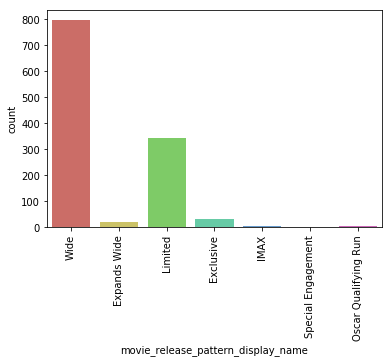

<Figure size 432x288 with 0 Axes>

In [21]:
#see the distribution of the movie_release_pattern_display_name
sns.countplot(x='movie_release_pattern_display_name',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#based on the result, majority of the movies are Wide, but there are some movies in Limited, Expands Wide and Exclusive

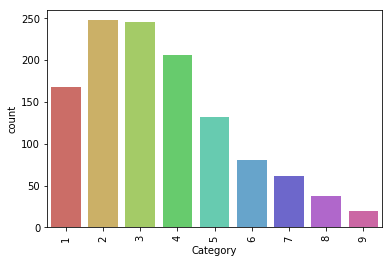

<Figure size 432x288 with 0 Axes>

In [22]:
#see the distribution of the Category
sns.countplot(x='Category',data=train_data,palette='hls')
plt.xticks(rotation=90)
plt.show()
plt.savefig('count_plot')
#based on the result, Category is well distributed

In [23]:
#Drop language 
train_data = train_data.drop(['language'], axis = 1)

In [24]:
#transfer product year from int to categorical data
train_data['production_year'] = train_data['production_year'].astype('object')

In [25]:
print(np.shape(train_data))
train_data.head()

(1196, 10)


,production_year,movie_sequel,creative_type,source,production_method,genre,movie_board_rating_display_name,movie_release_pattern_display_name,Category,production_year_2012
0,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,PG-13,Wide,9,0
1,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,PG-13,Wide,9,0
2,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,PG-13,Wide,9,0
3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,G,Wide,9,0
4,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,PG-13,Wide,9,0


From above results, we can see that there 1196 examples in the dataset and 10 variables. We need to transform the variables into dummy variables.

In [26]:
#create a dummy variable if it is categorical data and drop categorical columns
def create_dummy(data_input):
    var=None
    column_name=list(data_input.columns)
    for var in column_name:
        if data_input[var].dtypes == 'object':
            cat_list='var'+'_'+var
            cat_list = pd.get_dummies(data_input[var], prefix=var)
            data_input1=data_input.join(cat_list)
            data_input=data_input1
            data_input=data_input.drop([var],axis=1)
    return data_input

In [27]:
data_input = create_dummy(train_data)
print(np.shape(data_input))
data_input.head()

(1196, 65)


,movie_sequel,Category,production_year_2012,production_year_2007,production_year_2008,production_year_2009,production_year_2010,production_year_2011,creative_type_Contemporary Fiction,creative_type_Dramatization,...,movie_board_rating_display_name_PG,movie_board_rating_display_name_PG-13,movie_board_rating_display_name_R,movie_release_pattern_display_name_Exclusive,movie_release_pattern_display_name_Expands Wide,movie_release_pattern_display_name_IMAX,movie_release_pattern_display_name_Limited,movie_release_pattern_display_name_Oscar Qualifying Run,movie_release_pattern_display_name_Special Engagement,movie_release_pattern_display_name_Wide
0,0,9,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,9,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,9,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,9,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,9,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


# Softmax Classifier with One-layer Neural Network

Based on the target variable "Category", we can see that it has multiple different values. As a result, this is a classification problem. In order to classify "Category", the first algorithm I will use is Softmax regression, aka multinomial logistic regression. For the Softmax regression, we can think it as a one layer, k neurons (in this case, k = 9) neural network. Below is an example of one-layer neural network with Softmax activation function for the output layer.

<img src="Softmax_classifier.png" alt="Drawing" style="width: 400px;"/>

Image is from: http://eric-yuan.me/simple-deep-network/

Before starting to code the softmax regression algorithm, I will do "one-hot coding" for the targeted variable Category. The reason that I am doing the one-hot coding is the output of the softmax regression is a matrix in (1196,9) dimension. Without using Softmax classifier if the prediction is [0, 0.6, 0.4, 0.4, 0.4, 0.4, 0, 0.6, 0.7], the predict process will predict every data point which is above 0.5 as 1 [0, 1, 0, 0, 0, 0, 1, 1]. As a consequence, the movie is in category 2, 8, and 9, which is impossible. 

What Softmax function does is use exp(z1)/Σ[exp(z1)+exp(z2)+...+exp(z9]. As a result, the softmax prediction will be 
[0, 0.1538, 0.1026, 0.1026, 0.1026, 0.1026, 0, 0.1538, 0.1795]. So we can see that Category 9 has the highest number, so argmax = 9.

In [28]:
def onehot(data):
    
    data_with_dummy= create_dummy(data)
    dataY = data_with_dummy['Category']
    dataX = data_with_dummy.drop(['Category'],axis = 1)
    
    data_one_hot_Y = to_categorical(dataY)
    data_one_hot_Y = data_one_hot_Y[:,1:10] #drop the column 0
    dataX = np.asarray(dataX)
    
    return dataX, data_one_hot_Y


In [29]:
dataX, data_one_hot_Y = onehot(train_data)
print(data_one_hot_Y.shape)
print(dataX.shape)

(1196, 9)
(1196, 64)


After doing one-hot coding, then we split the data into train (72%), dev (18%), and test set (10%).

In [30]:
#transform the data from Pandas Frame to numpy array and split into Train, Dev and Test Set
def data_preprocess(data):
    
    dataX, data_one_hot_Y= onehot(data)
    #split train, dev, and test datasets
    x_train, x_test, y_train, y_test = train_test_split(dataX, data_one_hot_Y, test_size=0.1, random_state=0)
    
    return x_train, x_test, y_train, y_test
    

In [31]:
def kfold_split(k,x_train,y_train):
    kf = KFold(n_splits=k, random_state=0)
    all_kfold_trainX = []
    all_kfold_testX = []
    all_kfold_trainY = []
    all_kfold_testY = []
    for train_index, test_index in kf.split(x_train):
        kfold_trainX, kfold_testX = x_train[train_index], x_train[test_index]
        kfold_trainY, kfold_testY = y_train[train_index], y_train[test_index]
        all_kfold_trainX.append(kfold_trainX)
        all_kfold_testX.append(kfold_testX)
        all_kfold_trainY.append(kfold_trainY)
        all_kfold_testY.append(kfold_testY)
    
    return all_kfold_trainX, all_kfold_testX, all_kfold_trainY, all_kfold_testY

After splitting the data, we start to build the Softmax regression algorithm.
For the (i)th specific node, the prediction ŷ = exp(z[i]) / Σ(exp(z[i]), i=1,2,3,.....,m and z[i] = w[i]*x + b

In [32]:
def softmax(x_train, W, algorithm):

    if algorithm == "one_layer_softmax":
        Z = np.dot(x_train, W)
        soft_max = np.exp(Z)/ np.sum(np.exp(Z),axis=1, keepdims=True)
        
    elif algorithm == "deepNN":
        soft_max = np.exp(x_train - np.max(x_train))/np.sum(np.exp(x_train-np.max(x_train)),axis=1, keepdims=True)
    return soft_max

Then, we will use the cross-entropy loss to calculate the loss function of the prediction: 
L = -Σylog(ŷ) with L2 regularization. Also, we will calculate gradient descent of W. After calculating the loss function, we will use gradient descent to update the weights W and b.

In [33]:
def cross_entropy(x, y, lambd, lr, W, algorithm):
    soft_max = softmax(x, W, algorithm)
    m = x.shape[0]
    loss = (-1/m)*np.sum(y*np.log(soft_max)) + (lambd/2)*np.sum(W*W) #calculate the cross entropy loss
    grad = (-1/m)*np.dot(x.T, y - soft_max) + lambd*W #calculate the gradient descent
    W = W - lr*grad #using gradient descent to update W
    return loss, grad, W

Apply softmax model on the test dataset for prediction.

In [34]:
def prediction(x_test, y_test, W, algorithm):
    
    m = x_test.shape[0]
    soft_max = softmax(x_test, W, algorithm)
    soft_max_maximum = np.max(soft_max,axis=1)
    soft_max_maximum = soft_max_maximum.reshape(soft_max_maximum.shape[0],1)
    pred = ((soft_max-soft_max_maximum)==0)
    result = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        result[i] = (np.sum(pred[i]==y_test[i])==9)
    
    Accuracy = np.sum(result)/m
    return Accuracy

Run the main function. In the main function, we will decide the threshold to make sure the gradient descent is going to converge. The threshold is 1e-5. Otherwise, the maximum number of iterations will be 8000. Learning rate will 0.005. Lambda will be 0.1. I just arbitrarily determined numbers for hyper-parameters. Future work will include tuning these hyper-parameters.

In [35]:
def main_softmax(data, k, maxiterations=3000, learning_rate=0.2, lambd=0.1, algorithm = "one_layer_softmax"):

    x_train, x_test, y_train, y_test = data_preprocess(data)
    
    all_kfold_trainX, all_kfold_testX, all_kfold_trainY, all_kfold_testY = kfold_split(k,x_train,y_train)
    
    all_accuracy = []
    all_weights = []
    
    for i in range(k):     
        W = np.random.randn(all_kfold_trainX[i].shape[1],9)
        soft_max = softmax(all_kfold_trainX[i], W, algorithm)
        loss, grad, W = cross_entropy(all_kfold_trainX[i], all_kfold_trainY[i], lambd, learning_rate, W, algorithm)
        losses = []
        losses.append(loss)
        threshold = 1e-5
        prev_loss = 0
        j=1
        while abs(prev_loss - loss)>threshold and j < maxiterations:
            soft_max = softmax(all_kfold_trainX[i], W, algorithm)
            prev_loss = loss
            loss, grad, W = cross_entropy(all_kfold_trainX[i], all_kfold_trainY[i], lambd, learning_rate, W, algorithm)
            j+=1
            
            """
            # Print the cost every 100 training example
            if j % 100 == 0:
                print ("Loss after iteration %i: %f" %(j, loss))
            if j % 100 == 0:
                losses.append(loss)
            """
               
        Accuracy = prediction(all_kfold_testX[i], all_kfold_testY[i], W, algorithm)
        print("Accuracy is :", Accuracy, "in fold ", i)
        all_weights.append(W)
        all_accuracy.append(Accuracy)
    
    print("The mean accuracy of", k, "fold validation is: ", np.mean(all_accuracy))
    
    mean_weight = np.mean(all_weights, axis = 0)
    
    Accuracy = prediction(x_test, y_test,  mean_weight, algorithm)
    print("Test Set Accuracy is :", Accuracy)
    
    return mean_weight

In [36]:
softmax_Weights = main_softmax(train_data, k=10, maxiterations=8000, learning_rate=0.005, lambd=0.1, algorithm = "one_layer_softmax")

Accuracy is : 0.3055555555555556 in fold  0
Accuracy is : 0.21296296296296297 in fold  1
Accuracy is : 0.2777777777777778 in fold  2
Accuracy is : 0.19444444444444445 in fold  3
Accuracy is : 0.19444444444444445 in fold  4
Accuracy is : 0.3148148148148148 in fold  5
Accuracy is : 0.32710280373831774 in fold  6
Accuracy is : 0.24299065420560748 in fold  7
Accuracy is : 0.18691588785046728 in fold  8
Accuracy is : 0.22429906542056074 in fold  9
The mean accuracy of 10 fold validation is:  0.24813084112149536
Test Set Accuracy is : 0.2833333333333333


From the Softmax regression I got 28.3% accuracy.

---

# Random Forest

Random Forest is another way of doing classification. The best of Random Forest is it is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. According to the Bias-Variance Analysis: Variance(x) = 𝜌(𝜎^2) + (1-𝜌)/M * (𝜎^2). So as we increase the number of sample trees M, the Variance will reduce. Their ability to limit overfitting without substantially increasing error due to bias is the reaso that I am going to use this model for the case.

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
def randomforest(dev_trainX, dev_trainY, nestimators, maxdepth, minsampleleaf, minsamplesplit):
    
    #start to create the Random Forest Model
    rf_Model= RandomForestClassifier(n_estimators=nestimators, max_depth=maxdepth, min_samples_leaf= minsampleleaf,
                                 min_samples_split = minsamplesplit, random_state=0)
    
    rf_Model.fit(dev_trainX, dev_trainY)
    #print(rf_Model.feature_importances_)
    
    
    return rf_Model

In [39]:
def main_RF(data, k, nestimators, maxdepth, minsampleleaf, minsamplesplit):

    data_with_dummy = create_dummy(data)
    
    Y = data_with_dummy['Category']
    X = data_with_dummy.drop(['Category'], axis = 1)
    
    Y = np.asarray(Y)
    X = np.asarray(X)
    
    #just split original data, but not doing one-hot encoding
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
    
    
    all_kfold_trainX, all_kfold_testX, all_kfold_trainY, all_kfold_testY = kfold_split(k,x_train,y_train)
    
    best_accuracy = 0 #save the best accuracy
    best_hyperparameter = np.zeros(4) #to save the best combination of 4 different hyper-parameters
    best_model = None
    
    iterations = 1

    for i in range(k):
        iterations = 1
        while iterations<11:
            nestimators = random.randint(100,700)
            maxdepth = random.randint(20,50)
            minsampleleaf = random.randint(2,50)
            minsamplesplit = random.randint(3,40)
            m = all_kfold_testX[i].shape[0]
            result = np.zeros(m)
            rf_Model = randomforest(all_kfold_trainX[i], all_kfold_trainY[i], nestimators, 
                                    maxdepth, minsampleleaf, minsamplesplit)
            pred_result = rf_Model.predict(all_kfold_testX[i])
                        
            #start to calculate the accuracy
            for j in range(all_kfold_testX[i].shape[0]):
                result[j] = (pred_result[j]==all_kfold_trainY[i][j])
                            
            Accuracy = np.sum(result)/m
                        
            #to figure out the best combination of the hyper-parameters
            if Accuracy> best_accuracy:
                best_accuracy = Accuracy
                best_hyperparameter = [nestimators, maxdepth, minsampleleaf, minsamplesplit]
                best_model = rf_Model
                            
            print("Current progress of hyper-parameter tuning: ","fold",i, nestimators, maxdepth, minsampleleaf, minsamplesplit, Accuracy)
            iterations+=1
                            
    print("Best",k,"fold accuracy is: ", best_accuracy)
    print("Best n-estimators: ", best_hyperparameter[0])
    print("Best max_depth: ", best_hyperparameter[1])
    print("Best min_sample_leaf: ", best_hyperparameter[2])
    print("Best min_sample_split: ", best_hyperparameter[3])
    
    #using test dataset for prediction
    pred_result = best_model.predict(x_test)
    
    m = x_test.shape[0]
    result = np.zeros(m)
    #calcuate the accuracy
    for i in range(m):
        result[i] = pred_result[i]==y_test[i]
    
    Accuracy = np.sum(result)/x_test.shape[0]
    
    print("The Test Dataset Accuracy is: ",Accuracy)
    
    return best_hyperparameter, best_model

The reason that I am tuning the parameters by using randomly generated numbers is: 

From the left figure we can see that the hyperparameters have the grid layout. The important hyperparameter will decide when to reach the optimzal points. However, since it is grid layout, so the imporant hyperparameter only be tested three combinations. But none of them reached the highest value. However, if we use random hyperparameter tuning, we can gurantee that we will test more combinations of hyperparameters. And it has much higher chance to reach the highest value.

<img src="Hyperparameter Tuning Strategy.png" alt="Drawing" style="width: 400px;"/>

Image is from the paper "Random Search for Hyper-Parameter Optimization" by James Bergstra and Yoshua Bengio

In [40]:
best_hyperparameter, best_model = main_RF(train_data, k=10, nestimators=100, maxdepth = 50, 
                              minsampleleaf = 4, minsamplesplit = 5)

Current progress of hyper-parameter tuning:  fold 0 272 32 27 40 0.18518518518518517
Current progress of hyper-parameter tuning:  fold 0 419 35 46 21 0.2037037037037037
Current progress of hyper-parameter tuning:  fold 0 137 45 20 14 0.18518518518518517
Current progress of hyper-parameter tuning:  fold 0 183 39 44 10 0.2037037037037037
Current progress of hyper-parameter tuning:  fold 0 669 35 45 16 0.2037037037037037
Current progress of hyper-parameter tuning:  fold 0 412 36 3 25 0.16666666666666666
Current progress of hyper-parameter tuning:  fold 0 624 34 11 40 0.16666666666666666
Current progress of hyper-parameter tuning:  fold 0 301 23 28 36 0.18518518518518517
Current progress of hyper-parameter tuning:  fold 0 337 28 11 36 0.17592592592592593
Current progress of hyper-parameter tuning:  fold 0 211 42 38 10 0.19444444444444445
Current progress of hyper-parameter tuning:  fold 1 107 38 34 14 0.2222222222222222
Current progress of hyper-parameter tuning:  fold 1 476 39 33 37 0.203

Current progress of hyper-parameter tuning:  fold 9 258 37 42 39 0.2523364485981308
Current progress of hyper-parameter tuning:  fold 9 297 33 42 7 0.2523364485981308
Best 10 fold accuracy is:  0.29906542056074764
Best n-estimators:  475
Best max_depth:  35
Best min_sample_leaf:  49
Best min_sample_split:  32
The Test Dataset Accuracy is:  0.30833333333333335


The initial best accuracy I got is 30.83% from Random Forest.

---

# Deep Neural Network Softmax Classifier

After using the random forest, I got slightly better result based on the Test Dataset Accuracy. There is one more model that I want to try, which is Deep Neural Network with Softmax activation function for the output layer. As I mentioned in the description of Softmax regression model, the initial Softmax regression was a one-lay neural network which only contains input layer and output layer (activation function is softmax). The result that I want to Deep Neural Network is Deep Neural Network could help me do feature engeering automatically.

Suppose, we have a house pricing prediction problem and we will use Deep Neural Network to solve it.

<img src="Neural Network.png" alt="Drawing" style="width: 300px;"/>



Image is from: https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwiU45nYovveAhVGxoMKHXGtDGEQjB16BAgBEAQ&url=https%3A%2F%2Fwww.neuraldesigner.com%2F&psig=AOvVaw1W_iIhgju9h3Rz6RPDTFs7&ust=1543638231215045

For instance, if X1 is average income level around of the community. X2 is the criminal rate of the community. X3 is the cost of the school around this community and X4 is the number of squares of the house. So by combining them with different weights, they will generate new features for the data. For instance, by giving more weights to X1 and X3, the first neuron could stand for the school quality.

As a result, deep neural networks will use the original features to generate new features by combining different variables with different weights.

In [41]:
#in the initialization function, I will initialize W, b, and the structure of neural network
def initialization(x_train):
    
    layer_dims = [x_train.shape[1], 5, 6, 4, 7, 9]
    parameters = {} #create a empty dictionary to store weights (W and b)
    
    L = len(layer_dims) #get the total number of layers to initialize weights
    
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*np.sqrt(2./layer_dims[l-1])
        parameters['b'+str(l)] = np.zeros((1, layer_dims[l]))
        
    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1])) #allow to detect error early
    assert(parameters['b' + str(l)].shape == (1, layer_dims[l]))
        
    return parameters


First, I will calcuate Z = W.T * X + b. Then, I will do forward propagation by using ReLu as activation function:

<img src="ReLu.png" alt="Drawing" style="width: 300px;"/>

In [42]:
def linear_function(A, W, b):
    
    Z = np.dot(A,W.T)+b 
    cache = (A, W, b) #create a variable called cache to store data
    
    return Z, cache
    

In [43]:
def forward_propagation(A_prev, W, b, activation):
    
    if activation == "relu":
        Z, linear_cache = linear_function(A_prev, W, b)
        A = np.maximum(0,Z)
        Z_cache = Z
   
    if activation == "softmax":
        Z, linear_cache = linear_function(A_prev, W, b)
        A = softmax(Z, W, algorithm="deepNN")
        Z_cache = Z

    activation_cache = (linear_cache, Z_cache)
    
    return A, activation_cache

In [44]:
def l_layer_forward(X, parameters):
    
    caches = [] # define a list to store all of the relu_cache
    
    A = X #assign initial data to A
    
    L = len(parameters)//2 #get the integer number of half length of parameters
    
    #for the 1 to L-1 layers, I will use ReLu as activation function
    for l in range(1,L):
        A_prev = A
        A, activation_cache = forward_propagation(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], activation='relu')
        caches.append(activation_cache)
        
    #for the last layer (L) also called output layer, I will use Softmax function I created before
    #as activation function
    
    AL, activation_cache = forward_propagation(A, parameters['W'+str(L)], parameters['b'+str(L)], activation='softmax')
    
    caches.append(activation_cache)
    
    return AL, caches
    

In [45]:
def cost_function(AL, Y, parameters, lambd):
    
    #create the cross-entropy loss
    m = Y.shape[0]
    
    #-1 * np.sum(y * (z + (-z.max() - np.log(np.sum(np.exp(z-z.max()))))))
    #loss = (-1)*np.sum(Y * (Z - np.max(Z) - np.log(np.sum(np.exp(Z - np.max(Z)))))) 
    loss =  loss = (-1/m)*np.sum(Y*np.log(AL))
    """
    + (lambd/2)*(np.sum(parameters['W1']*parameters['W1'])
                                                    +np.sum(parameters['W2']*parameters['W2']
                                                    +np.sum(parameters['W3']*parameters['W3'])
                                                    +np.sum(parameters['W4']*parameters['W4'])
                                                    +np.sum(parameters['W5']*parameters['W5'])))
    """

    loss = np.squeeze(loss) #Remove single-dimensional entries from the shape of an array. 
                            #For example, if X shape is (3,1), then np.squeeze(X) is (3,)
    assert(loss.shape == ())
        
    return loss

In [46]:
def linear_backward(dZ, cache):
    
    #define the back proprogation funciton of the linear part of the Neural Network
    
    A_prev, W, b = cache
    m = A_prev.shape[0] #number of the data in the dataset
    
    dW = (1/m)*np.dot(dZ.T, A_prev)
    db = (1/m)*np.sum(dZ,axis=0,keepdims=True)
    dA_prev = np.dot(dZ, W) #Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    
    
    return dA_prev, dW, db

In [47]:
def activation_backward(dA, AL, activation_cache, activation):
    
    linear_cache, Z_cache = activation_cache
    
    if activation =="relu":
        Z = Z_cache
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
        #print("dZ relu",dZ)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation =="softmax":
        A_prev, W, b = linear_cache
        dZ = dA * (AL - AL**2)
        #print("dZ softmax",dZ)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [48]:
def l_layer_backward(AL, Y, caches):
    #Implement the backward propagation
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - np.divide(Y, AL)

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, AL, current_cache, activation = "softmax")

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 1)], AL, current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [49]:
def gradient_descent_update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
     
    #update the parameters using gradient descent
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [50]:
def deepNN_predict(x_test, y_test, parameters):
    
    m = x_test.shape[0]
    
    # Forward propagation
    soft_max, caches = l_layer_forward(x_test, parameters)
    
    soft_max_maximum = np.max(soft_max,axis=1)
    soft_max_maximum = soft_max_maximum.reshape(soft_max_maximum.shape[0],1)
    pred = ((soft_max-soft_max_maximum)==0)
    result = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        result[i] = (np.sum(pred[i]==y_test[i])==9)
    
    Accuracy = np.sum(result)/m
 
    return Accuracy

In [51]:
def deepNN_main(data, k, num_iterations=3000, learning_rate=0.001, lambd=0.1, algorithm = "deepNN"):
    
    data_with_dummy = create_dummy(data)
    x_train, x_test, y_train, y_test = data_preprocess(data_with_dummy)
    all_kfold_trainX, all_kfold_testX, all_kfold_trainY, all_kfold_testY = kfold_split(k,x_train,y_train)    
    
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    best_accuracy = 0 #save the best accuracy
    best_parameter = None 
    
    for fold in range(k):
        X = all_kfold_trainX[fold]
        Y = all_kfold_trainY[fold]
        KX_test = all_kfold_testX[fold]
        KY_test = all_kfold_testY[fold]
        
        # Parameters initialization
        parameters = initialization(x_train)
    
        # Loop gradient descent
        for i in range(num_iterations):
            # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SOFTMAX
            AL, caches = l_layer_forward(X, parameters)
            #print(AL)
            # Compute cost.
            #last_cache = caches[-1]
            #linear_cache, Z_cache = last_cache
            #cost = cost_function(Y, Z_cache, parameters, lambd)
            cost = cost_function(AL, Y, parameters, lambd)

            # Backward propagation.
            grads = l_layer_backward(AL, Y, caches)

            # Update parameters.
            parameters = gradient_descent_update_parameters(parameters, grads, learning_rate)

            if i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
            if i % 100 == 0:
                costs.append(cost)
            
            
        Accuracy = deepNN_predict(KX_test, KY_test, parameters)
        print("fold ", fold, " Accuracy: "  + str(Accuracy))
        
        if Accuracy > best_accuracy:
            best_accuracy = Accuracy
            best_parameter = parameters
    
    
    Accuracy = deepNN_predict(x_test, y_test, best_parameter)
    
    print("Final Accuracy on best parameters is:", str(Accuracy))

    return best_parameter

In [52]:
best_parameter   = deepNN_main(train_data, k=10, num_iterations=3000, learning_rate=0.00001, lambd=0.1, algorithm = "deepNN")

Cost after iteration 0: 2.201750
Cost after iteration 100: 2.201700
Cost after iteration 200: 2.201648
Cost after iteration 300: 2.201597
Cost after iteration 400: 2.201549
Cost after iteration 500: 2.201501
Cost after iteration 600: 2.201456
Cost after iteration 700: 2.201413
Cost after iteration 800: 2.201371
Cost after iteration 900: 2.201328
Cost after iteration 1000: 2.201285
Cost after iteration 1100: 2.201243
Cost after iteration 1200: 2.201201
Cost after iteration 1300: 2.201159
Cost after iteration 1400: 2.201117
Cost after iteration 1500: 2.201073
Cost after iteration 1600: 2.201028
Cost after iteration 1700: 2.200985
Cost after iteration 1800: 2.200941
Cost after iteration 1900: 2.200900
Cost after iteration 2000: 2.200858
Cost after iteration 2100: 2.200815
Cost after iteration 2200: 2.200774
Cost after iteration 2300: 2.200734
Cost after iteration 2400: 2.200693
Cost after iteration 2500: 2.200653
Cost after iteration 2600: 2.200614
Cost after iteration 2700: 2.200574
Cost

Cost after iteration 1400: 2.213468
Cost after iteration 1500: 2.213330
Cost after iteration 1600: 2.213190
Cost after iteration 1700: 2.213051
Cost after iteration 1800: 2.212912
Cost after iteration 1900: 2.212773
Cost after iteration 2000: 2.212634
Cost after iteration 2100: 2.212494
Cost after iteration 2200: 2.212355
Cost after iteration 2300: 2.212215
Cost after iteration 2400: 2.212075
Cost after iteration 2500: 2.211936
Cost after iteration 2600: 2.211797
Cost after iteration 2700: 2.211659
Cost after iteration 2800: 2.211521
Cost after iteration 2900: 2.211384
fold  7  Accuracy: 0.18691588785046728
Cost after iteration 0: 2.220232
Cost after iteration 100: 2.220381
Cost after iteration 200: 2.220526
Cost after iteration 300: 2.220665
Cost after iteration 400: 2.220805
Cost after iteration 500: 2.220947
Cost after iteration 600: 2.221091
Cost after iteration 700: 2.221236
Cost after iteration 800: 2.221383
Cost after iteration 900: 2.221532
Cost after iteration 1000: 2.221681
C

So the final accuracy that I can get from Deep Neural Network is 20.83%.

---

Start to give labels in the scoring dataset

In [53]:
score_train_data = train_data = pd.read_excel("Scoring sheet.xlsx")

In [54]:
score_train_data.head()

,id,name,display_name,production_budget,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name
0,7970115,"Avengers, The (2011)",Marvel's The Avengers,225000000,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,English,for intense sequences of sci-fi violence and a...,PG-13,Wide
1,174540115,Dark Knight Rises The,The Dark Knight Rises,0,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,English,"for intense sequences of violence and action, ...",PG-13,Wide
2,149080115,Bond 23,Skyfall,200000000,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,English,"for intense violent sequences throughout, some...",PG-13,Wide
3,136020115,Twilight Saga Breaking Dawn Part 2 The,"The Twilight Saga: Breaking Dawn, Part 2",136200000,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,English,for sequences of violence including disturbing...,PG-13,Wide
4,53500115,"Hobbit, The",The Hobbit: An Unexpected Journey,270000000,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for extended sequences of intense fantasy acti...,PG-13,Wide


As the same as above, I will drop "Id", "Name", "Display Name", "language", and "board_rating_reason". The production_bedget is a variable that only exists in the scoring dataset, so I will drop it too.

In [55]:
score_train_data = score_train_data.drop(['id'], axis = 1)
score_train_data = score_train_data.drop(['name'], axis = 1)
score_train_data = score_train_data.drop(['display_name'], axis = 1)
score_train_data = score_train_data.drop(['production_budget'], axis = 1)
score_train_data = score_train_data.drop(['language'], axis = 1)
score_train_data = score_train_data.drop(['board_rating_reason'], axis = 1)

#transfer product year from int to categorical data
score_train_data['production_year'] = score_train_data['production_year'].astype('object')

In [56]:
score_train_data.head()

,production_year,movie_sequel,creative_type,source,production_method,genre,movie_board_rating_display_name,movie_release_pattern_display_name
0,2012,0,Super Hero,Based on Comic/Graphic Novel,Live Action,Adventure,PG-13,Wide
1,2012,1,Super Hero,Based on Comic/Graphic Novel,Live Action,Action,PG-13,Wide
2,2012,1,Contemporary Fiction,Based on Fiction Book/Short Story,Live Action,Action,PG-13,Wide
3,2012,1,Fantasy,Based on Fiction Book/Short Story,Live Action,Drama,PG-13,Wide
4,2012,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,PG-13,Wide


In [57]:
score_dataX = create_dummy(score_train_data)
new_dummy = score_dataX.columns
print(new_dummy)

Index(['movie_sequel', 'production_year_2012',
       'creative_type_Contemporary Fiction', 'creative_type_Dramatization',
       'creative_type_Factual', 'creative_type_Fantasy',
       'creative_type_Historical Fiction', 'creative_type_Kids Fiction',
       'creative_type_Science Fiction', 'creative_type_Super Hero',
       'source_Based on Comic/Graphic Novel',
       'source_Based on Factual Book/Article',
       'source_Based on Fiction Book/Short Story',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Based on Game',
       'source_Based on Play', 'source_Based on Real Life Events',
       'source_Based on TV', 'source_Original Screenplay', 'source_Remake',
       'production_method_Animation/Live Action',
       'production_method_Digital Animation', 'production_method_Live Action',
       'genre_Action', 'genre_Adventure', 'genre_Comedy',
       'genre_Concert/Performance', 'genre_Documentary', 'genre_Drama',
       'genre_Horror', 'genre_Romantic Comedy', 'genre_T

In [58]:
data_input = data_input.drop(['Category'], axis = 1)
train_dummy = data_input.columns
print(train_dummy)

Index(['movie_sequel', 'production_year_2012', 'production_year_2007',
       'production_year_2008', 'production_year_2009', 'production_year_2010',
       'production_year_2011', 'creative_type_Contemporary Fiction',
       'creative_type_Dramatization', 'creative_type_Factual',
       'creative_type_Fantasy', 'creative_type_Historical Fiction',
       'creative_type_Kids Fiction', 'creative_type_Multiple Creative Types',
       'creative_type_Science Fiction', 'creative_type_Super Hero',
       'source_Based on Comic/Graphic Novel',
       'source_Based on Factual Book/Article',
       'source_Based on Fiction Book/Short Story',
       'source_Based on Folk Tale/Legend/Fairytale', 'source_Based on Game',
       'source_Based on Musical or Opera', 'source_Based on Play',
       'source_Based on Real Life Events', 'source_Based on Short Film',
       'source_Based on TV', 'source_Based on Theme Park Ride',
       'source_Based on Toy', 'source_Compilation',
       'source_Original Scr

In [59]:
different_dummy = train_dummy.difference(new_dummy)

for v in different_dummy:
    score_dataX[v] = 0

In [60]:
score_dataX = np.asarray(score_dataX)
print(score_dataX.shape)

(91, 64)


In [61]:
# score with neural network
def deepNN_score(x_test, parameters):
    # Forward propagation
    soft_max, caches = l_layer_forward(x_test, parameters)
    return soft_max

In [62]:
# Neural network prediction on score dataset
NN_preds = deepNN_score(score_dataX, best_parameter)
print(NN_preds)

[[0.11135264 0.11335245 0.11148189 0.11216153 0.10945391 0.11044731
  0.11048242 0.11003182 0.11123604]
 [0.11135264 0.11335245 0.11148189 0.11216153 0.10945391 0.11044731
  0.11048242 0.11003182 0.11123604]
 [0.10854192 0.13380496 0.11032019 0.12372353 0.09464801 0.10100133
  0.10127272 0.10484216 0.12184517]
 [0.09139467 0.16135226 0.12316824 0.09766016 0.12267233 0.10889158
  0.09795207 0.09576103 0.10114765]
 [0.08768459 0.17204499 0.12509766 0.09476927 0.12493136 0.10820877
  0.09537401 0.09291335 0.09897602]
 [0.11135264 0.11335245 0.11148189 0.11216153 0.10945391 0.11044731
  0.11048242 0.11003182 0.11123604]
 [0.10948052 0.12749335 0.11077596 0.12028733 0.09892787 0.10382712
  0.1040329  0.10646652 0.11870842]
 [0.10872861 0.13257927 0.11041484 0.12306504 0.0954608  0.10154416
  0.10180327 0.10515885 0.12124516]
 [0.10948052 0.12749335 0.11077596 0.12028733 0.09892787 0.10382712
  0.1040329  0.10646652 0.11870842]
 [0.11092869 0.11887833 0.11136794 0.11519945 0.1051363  0.10808

In [63]:
# Random Forest prediction on score dataset 
RF_preds = best_model.predict_proba(score_dataX)
print(RF_preds)

[[0.16761782 0.20939279 0.19786562 0.16817115 0.09656669 0.06686224
  0.0544971  0.02705533 0.01197125]
 [0.18245484 0.19884055 0.17867058 0.15119207 0.09736304 0.05922738
  0.06644543 0.03597846 0.02982765]
 [0.19442389 0.21411469 0.17989036 0.14273225 0.08926392 0.0546598
  0.06096336 0.03506907 0.02888266]
 [0.16259247 0.19837459 0.17670873 0.15149105 0.10579958 0.06279528
  0.07233245 0.03907968 0.03082616]
 [0.16259247 0.19837459 0.17670873 0.15149105 0.10579958 0.06279528
  0.07233245 0.03907968 0.03082616]
 [0.15488392 0.18396393 0.17474972 0.16033974 0.11071762 0.06315243
  0.0773078  0.04166523 0.03321961]
 [0.16713952 0.21312116 0.19371802 0.15080459 0.09477463 0.0645788
  0.05887907 0.03880694 0.01817727]
 [0.15371397 0.18647198 0.16978176 0.14217539 0.1077796  0.06206645
  0.08413723 0.05460225 0.03927136]
 [0.16713952 0.21312116 0.19371802 0.15080459 0.09477463 0.0645788
  0.05887907 0.03880694 0.01817727]
 [0.1450969  0.17801482 0.16390916 0.14202777 0.11339268 0.067049
 

In [64]:
# Softmax Classifier prediction on score dataset
Softmax_preds = softmax(score_dataX, softmax_Weights, algorithm="one_layer_softmax")
print(Softmax_preds)

[[0.13542183 0.14729553 0.13700703 0.14135543 0.10762911 0.0942428
  0.08846252 0.07647774 0.07210799]
 [0.15137711 0.14477011 0.1322863  0.13625474 0.10445838 0.08948892
  0.09124693 0.07598576 0.07413176]
 [0.14728161 0.14608934 0.13683434 0.13682328 0.10552195 0.08615871
  0.08881818 0.07919703 0.07327557]
 [0.1154955  0.13628584 0.13280109 0.13637584 0.12534471 0.09800675
  0.09709191 0.08423237 0.07436599]
 [0.11203798 0.13624996 0.13516041 0.13091395 0.12778659 0.09632815
  0.10086801 0.08432314 0.07633181]
 [0.13332028 0.13697336 0.1272767  0.13801271 0.11416459 0.09230834
  0.09845945 0.08144843 0.07803614]
 [0.11475845 0.13729926 0.13240677 0.12289124 0.11851772 0.10043019
  0.09472536 0.09304176 0.08592925]
 [0.11238873 0.12701215 0.12236206 0.11935979 0.12505915 0.09785603
  0.10488054 0.09857259 0.09250898]
 [0.11475845 0.13729926 0.13240677 0.12289124 0.11851772 0.10043019
  0.09472536 0.09304176 0.08592925]
 [0.09554875 0.11189813 0.11085961 0.11439395 0.13428072 0.106406

In [65]:
sum_preds = RF_preds + Softmax_preds + NN_preds
avg_preds = sum_preds/3
print(avg_preds)

[[0.13813076 0.15668026 0.14878485 0.1405627  0.10454991 0.09051745
  0.08448068 0.0711883  0.06510509]
 [0.14839486 0.15232103 0.14081292 0.13320278 0.10375844 0.08638787
  0.08939159 0.07399868 0.07173182]
 [0.15008247 0.16466966 0.1423483  0.13442635 0.09647796 0.08060661
  0.08368475 0.07303609 0.0746678 ]
 [0.12316088 0.16533756 0.14422602 0.12850902 0.11793888 0.08989787
  0.08912548 0.07302436 0.06877993]
 [0.12077168 0.16888984 0.1456556  0.12572476 0.11950584 0.08911073
  0.08952483 0.07210539 0.06871133]
 [0.13318561 0.14476324 0.1378361  0.13683799 0.11144537 0.08863603
  0.09541656 0.07771516 0.07416393]
 [0.1304595  0.15930459 0.14563358 0.13132772 0.1040734  0.08961204
  0.08587911 0.07943841 0.07427165]
 [0.12494377 0.1486878  0.13418622 0.12820007 0.10943318 0.08715555
  0.09694035 0.08611123 0.08434184]
 [0.1304595  0.15930459 0.14563358 0.13132772 0.1040734  0.08961204
  0.08587911 0.07943841 0.07427165]
 [0.11719145 0.13626376 0.12871224 0.12387372 0.11760324 0.09384

In [66]:
#convert Softmax prediction probabilities to class score
class_preditions_softmax = np.argmax(Softmax_preds, axis=1)+1

print("Softmax Classifier Prediction:", class_preditions_softmax)

Softmax Classifier Prediction: [2 1 1 4 2 4 2 2 2 5 4 1 5 2 4 3 1 2 1 2 4 4 2 2 4 5 4 4 5 4 2 1 3 4 2 4 2
 2 2 1 2 2 5 4 1 1 4 4 4 2 1 2 2 5 7 2 4 2 3 2 3 1 2 2 2 2 2 2 4 4 2 4 2 4
 1 2 2 4 2 1 4 2 4 2 1 2 2 4 4 2 3]


In [67]:
#convert Random Forest prediction probabilities to class score
class_preditions_rf = np.argmax(RF_preds, axis=1)+1

print("Random Forest Classifier Prediction:", class_preditions_rf)

Random Forest Classifier Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [68]:
#convert Neural Network prediction probabilities to class score
class_preditions_NN = np.argmax(NN_preds, axis=1)+1

print("Neural Network Classifier Prediction:", class_preditions_NN)

Neural Network Classifier Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [69]:
#convert average prediction probabilities to class score
class_preditions_avg = np.argmax(avg_preds, axis=1)+1

print("Average all three Classifiers Prediction:", class_preditions_avg)

Average all three Classifiers Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]


From the result, I can see the Neural Network prediction result is not good, since the Neural Network model is overfitted. The simple softmax classifier's result seems reasonable, so I would use the Softmax result for reference of investment. Softmax Classifier Prediction: [2 1 1 4 2 4 2 2 2 5 4 1 5 2 4 3 1 2 1 2 4 4 2 2 4 5 4 4 5 4 2 1 3 4 2 4 2 2 2 1 2 2 5 4 1 1 4 4 4 2 1 2 2 5 7 2 4 2 3 2 3 1 2 2 2 2 2 2 4 4 2 4 2 4 1 2 2 4 2 1 4 2 4 2 1 2 2 4 4 2 3]

AttributeError: 'str' object has no attribute 'columns'

In [75]:
csv_softmax_predictions = pd.DataFrame(class_preditions_softmax)

In [ ]:
csv_softmax_predictions.to_csv()